# Bitcoin (BTC-USA) - Analysis and Prediction

In this project, we will try to analyze and predict the price of Bitcoin.

## 1. Business Understanding

Cryptocurrency is a digital or virtual currency that is almost impossible to counterfeit because it is cryptographically secured. Many cryptocurrencies are decentralized networks based on blockchain technology (Investopedia, 2021). Several popular cryptocurrencies on the market like Bitcoin (digital gold) and alternative coins such as Ethereum, Litecoin, etc.

The aim of the project is to perform a technical analysis of the Bitcoin price and predict the Bitcoin price based on historical data. We will compare cryptocurrencies with other investment alternatives such as stocks and gold.

Several indicators can be used for technical analysis such as Daily Return, Value at Risk, Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), and Buy or Sell Signal. In addition, the Autoregressive Integrated Moving Average (ARIMA) will be applied to predict the Bitcoin price. ARIMA model is suitable for analyzing and predicting time series data future trends (Pai et al, 2005; Brownlee, 2017; Investopedia, 2019).

There are three (3) key aspects in the ARIMA model such as:

1. AR (Autoregression): This model uses a dependent relationship between the number of observations and the observation lag.
2. I (Integrated): To establish stationarity in time series data, this model introduces the difference in raw observations.
3. MA (Moving Average): This model considers the dependence between observations and the residual error of the moving average model applied to lagging observations.

There are three (3) parameters of the ARIMA model, namely p, d, and q. The parameters are defined as below:

1. p: the number of observed lags included in the model. This is also called the lag sequence.
2. d: the amount of difference in raw observations or degree of difference.
3. q: the size of the moving average (MA) window or moving average sequence.

Without further ado, let's get started with acquiring our dataset first. The data acquisition process will be described in detail in the next section.

## 2. Data Acquisition

How to get the dataset? You can download the historical data on yahoo finance. Here's the link to access the Bitcoin historical data: https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD

1. Click on the "Historical Data" to see all the Bitcoin price.
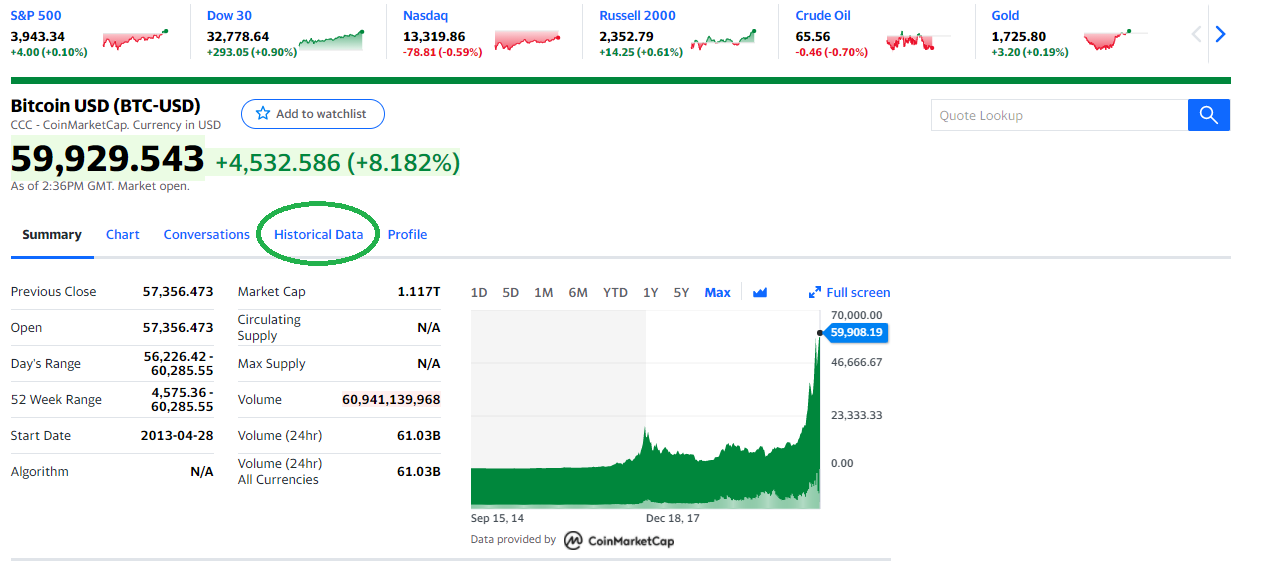

2. Chose the time period as "MAX".
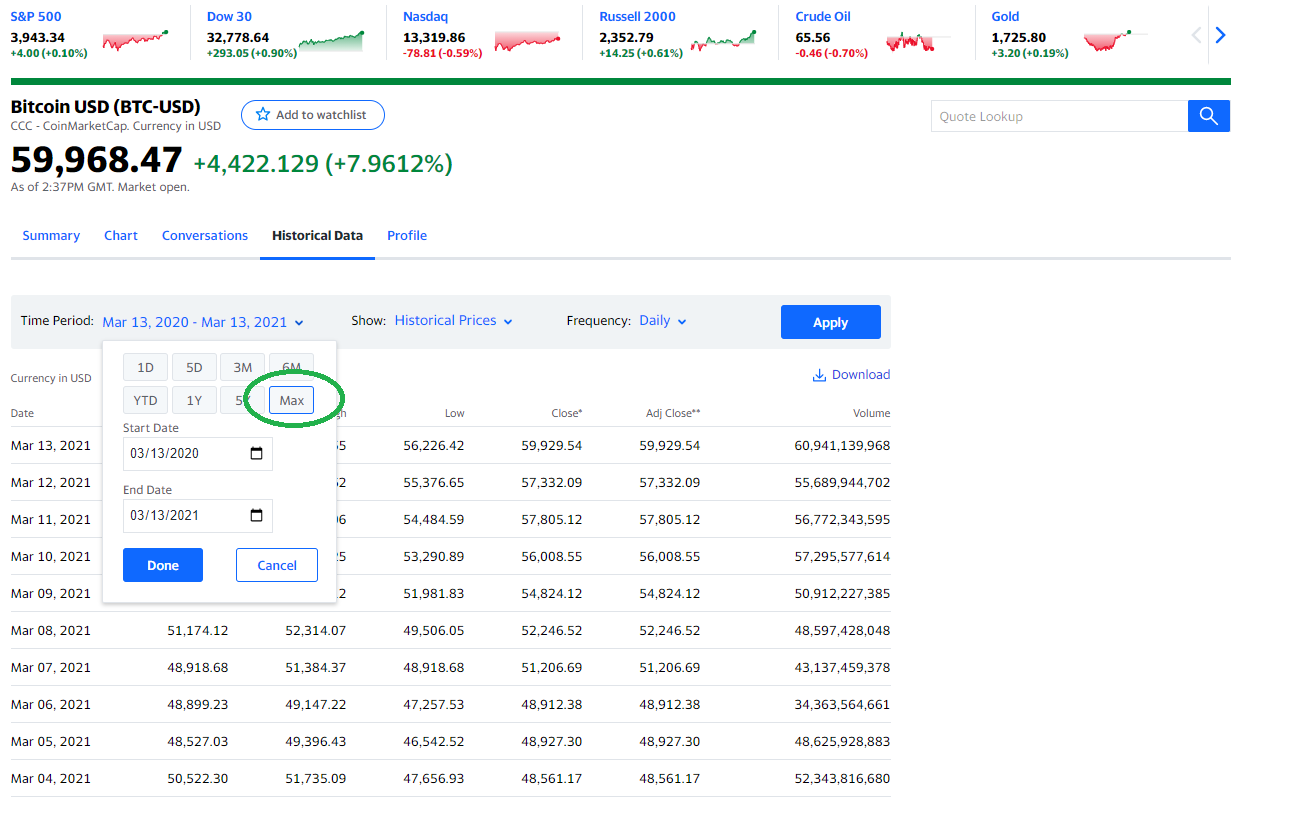

3. Show the "Historical Prices"
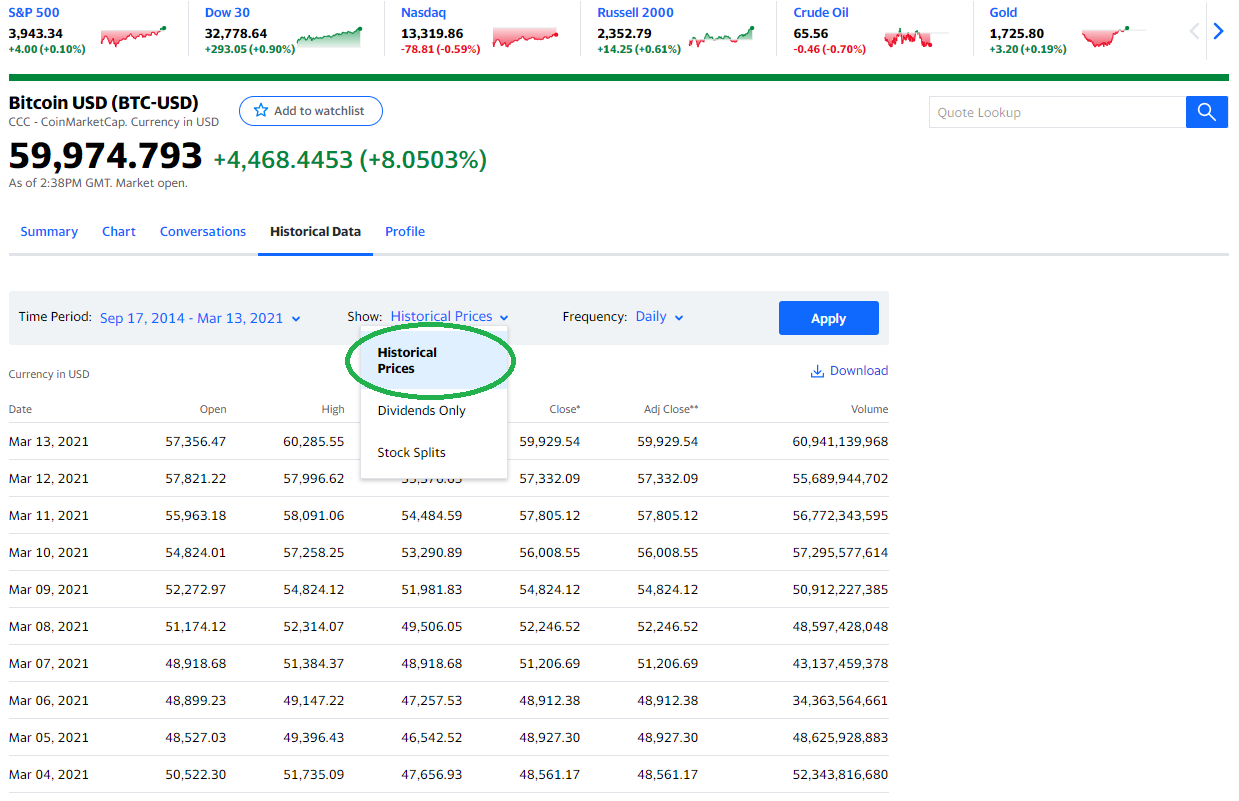

4. Show frequency data in "Daily". Thus, it will provide the Bitcoin price until the latest day on daily basis.
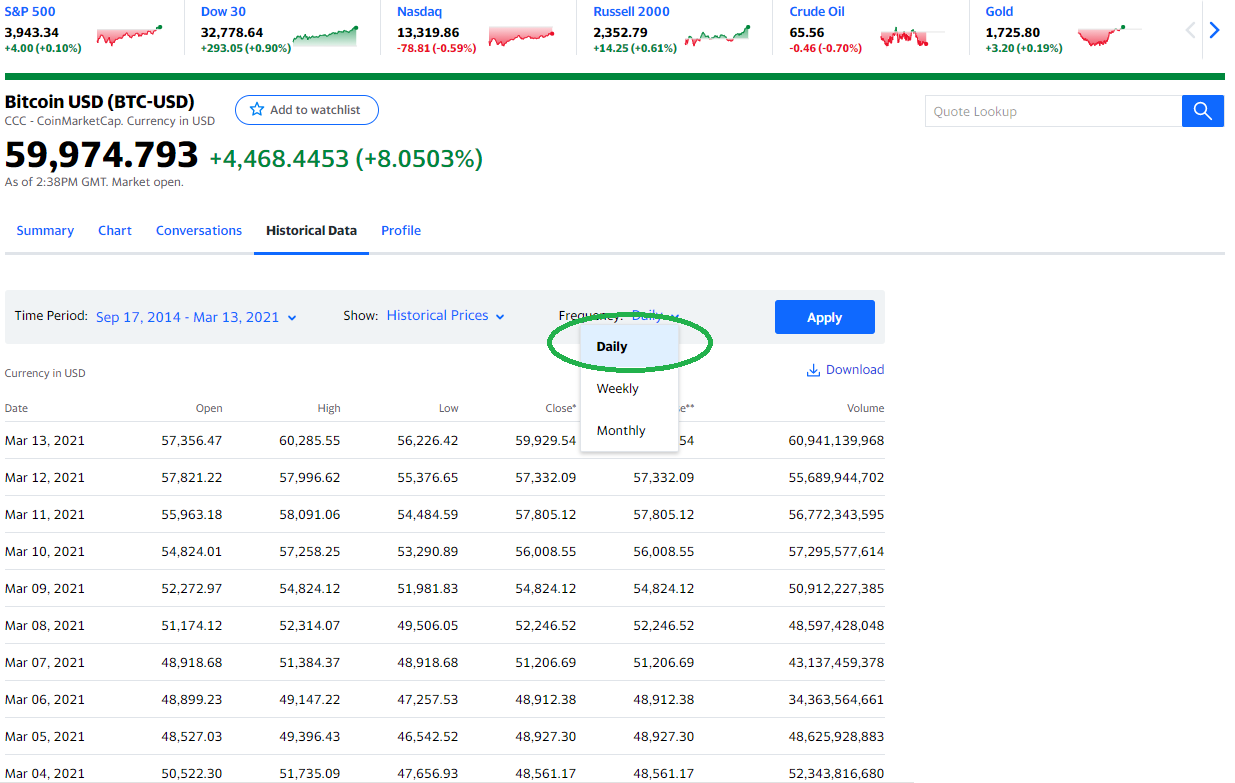

5. Click "Download". Yeah! Now the download process is progressing.
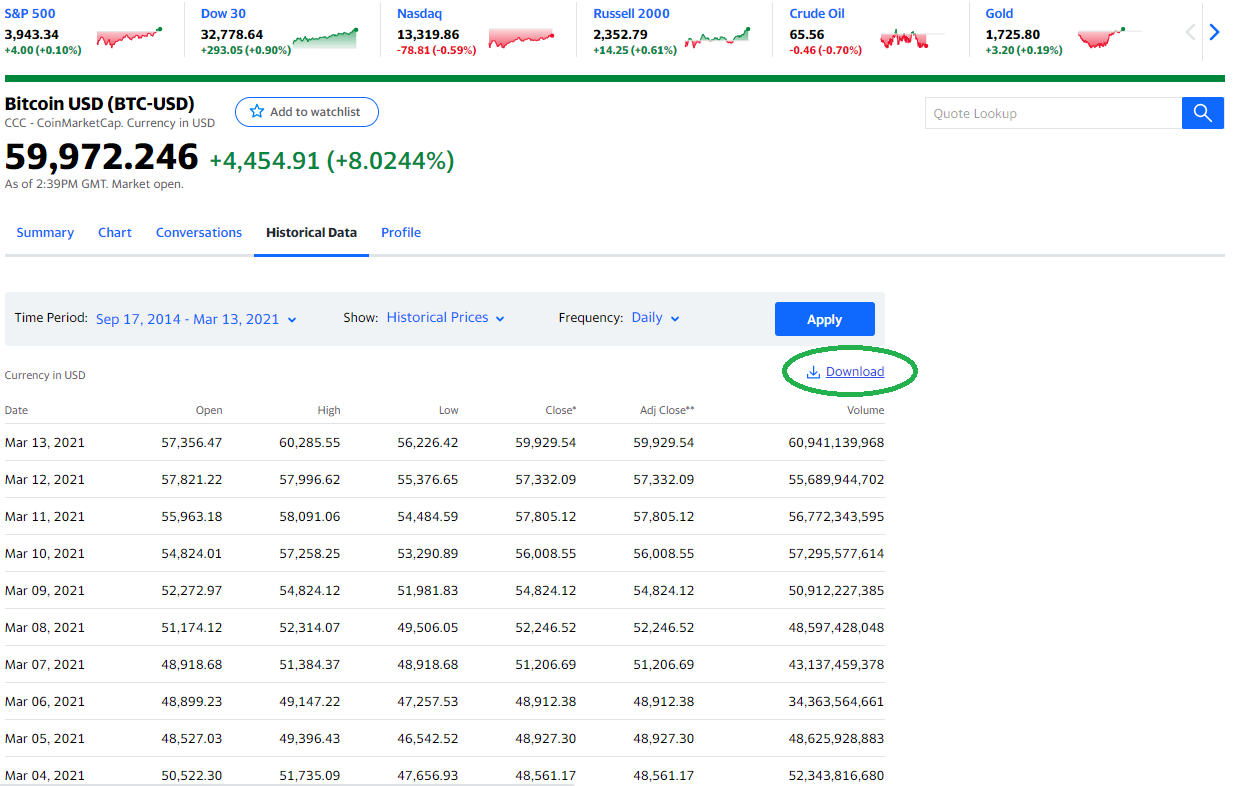

After the download is finished, you will have the .csv file containing data such as date, open, high, low, close, adj close, and volume.

Note that in this project I use the Bitcoin historical price from September 17th, 2014 until March 18th, 2021. The pictures above mentioned illustrating the process of Bitcoin data acquisition through Yahoo Finance.

Now we have the dataset. Let's explore this dataset!

## 3. Data Understanding

In [1]:
#import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA as ARIMA
from math import sqrt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from ta.momentum import RSIIndicator
import pandas.util.testing as tm


%matplotlib inline
pd.set_option('display.max_columns', None)

sns.set()

# Data viz by using Plotly
import plotly.express as px
import plotly.graph_objects as go

# ignore warnings
import warnings  
warnings.filterwarnings('ignore')

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing the Bitcoin dataset
crypto_dir = 'cryptodata' #data was downloaded on 18 Mar 2021

#Bitcoin
btc = pd.read_csv(crypto_dir+'/BTC-USD.csv')

To make a comparison, we will use other crypto data, gold price, and company stock price as well

In [3]:
#Etherium
eth = pd.read_csv(crypto_dir+'/ETH-USD.csv')

#Litecoin
ltc = pd.read_csv(crypto_dir+'/LTC-USD.csv')

In [4]:
# importing the gold dataset
gold_dir = 'golddata' 

#Gold
gold = pd.read_csv(gold_dir+'/GC=F.csv')

In [5]:
# importing the company stock dataset
stk_dir = 'stockdata' 

#Google stock
goog = pd.read_csv(stk_dir+'/GOOG.csv')

#Tesla stock
tsla = pd.read_csv(stk_dir+'/TSLA.csv')

#Amazon stock
amzn = pd.read_csv(stk_dir+'/AMZN.csv')

In [6]:
# cheking missing values in Bitcoin dataset
btc[btc.isnull().any(axis=1)]

Date  Open  High  Low  Close  Adj Close  Volume
2039  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
2214  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
2217  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
2218  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN
2370  2021-03-14   NaN   NaN  NaN    NaN        NaN     NaN

In [7]:
# cheking missing values in Ethereum dataset
eth[eth.isnull().any(axis=1)]

Date  Open  High  Low  Close  Adj Close  Volume
1715  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
1890  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
1893  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
1894  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN
2046  2021-03-14   NaN   NaN  NaN    NaN        NaN     NaN

In [8]:
# cheking missing values in Litecoin dataset
ltc[ltc.isnull().any(axis=1)]

Date  Open  High  Low  Close  Adj Close  Volume
2039  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
2214  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
2217  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
2218  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN
2370  2021-03-14   NaN   NaN  NaN    NaN        NaN     NaN
2374  2021-03-18   NaN   NaN  NaN    NaN        NaN     NaN

In [9]:
# cheking missing values in Gold dataset
gold[gold.isnull().any(axis=1)]

Date  Open  High  Low  Close  Adj Close  Volume
3     2000-09-04   NaN   NaN  NaN    NaN        NaN     NaN
61    2000-11-23   NaN   NaN  NaN    NaN        NaN     NaN
62    2000-11-24   NaN   NaN  NaN    NaN        NaN     NaN
83    2000-12-25   NaN   NaN  NaN    NaN        NaN     NaN
88    2001-01-01   NaN   NaN  NaN    NaN        NaN     NaN
...          ...   ...   ...  ...    ...        ...     ...
4803  2019-07-03   NaN   NaN  NaN    NaN        NaN     NaN
4907  2019-11-29   NaN   NaN  NaN    NaN        NaN     NaN
4924  2019-12-24   NaN   NaN  NaN    NaN        NaN     NaN
5158  2020-11-27   NaN   NaN  NaN    NaN        NaN     NaN
5177  2020-12-24   NaN   NaN  NaN    NaN        NaN     NaN

[112 rows x 7 columns]

In [10]:
# cheking missing values in Google dataset
goog[goog.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

In [11]:
# cheking missing values in Tesla dataset
tsla[tsla.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

In [12]:
# cheking missing values in Amazon dataset
amzn[amzn.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Several NaN values can be found in the Bitcoin, Ethereum, Litecoin, and Gold dataset. These could happened due to various reasons. It is necessary to handle these NaN values becasue it will affect the analysis and prediction process. 

In [13]:
# identify how many missing values in each feature (i.e. BTC)
btc.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

There are several option to take care the missing values or Nan values in the dateset. We can subtitute it with median values, mean values, or remove datapoints. In this case, we will remove all Nan values from our dataset since mean values and meadian values do not applicable for this case.

In [14]:
# drop missing values from the datasets
btc = btc.dropna()
eth = eth.dropna()
ltc = ltc.dropna()
gold = gold.dropna()

In [15]:
# check the shape of datasets
btc.shape, eth.shape, ltc.shape, gold.shape, goog.shape, tsla.shape, amzn.shape

((2370, 7), (2046, 7), (2370, 7), (5120, 7), (4173, 7), (2699, 7), (6000, 7))

In [16]:
# check the dataset
btc.tail()

Date          Open          High           Low         Close  \
2369  2021-03-13  57343.371094  61683.863281  56217.972656  61243.085938   
2371  2021-03-15  59267.429688  60540.992188  55393.164063  55907.199219   
2372  2021-03-16  55840.785156  56833.179688  53555.027344  56804.902344   
2373  2021-03-17  56825.828125  58969.816406  54528.628906  58870.894531   
2374  2021-03-18  57963.003906  59983.597656  57569.382813  58056.300781   

         Adj Close        Volume  
2369  61243.085938  6.066983e+10  
2371  55907.199219  6.641937e+10  
2372  56804.902344  5.974980e+10  
2373  58870.894531  6.025831e+10  
2374  58056.300781  5.715726e+10

In [17]:
# check the dataset info
btc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2370 non-null   object 
 1   Open       2370 non-null   float64
 2   High       2370 non-null   float64
 3   Low        2370 non-null   float64
 4   Close      2370 non-null   float64
 5   Adj Close  2370 non-null   float64
 6   Volume     2370 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.1+ KB


In [18]:
# describe the dataset
btc.describe()

Open          High           Low         Close     Adj Close  \
count   2370.000000   2370.000000   2370.000000   2370.000000   2370.000000   
mean    6130.294229   6306.904716   5951.038084   6154.683741   6154.683741   
std     8342.214007   8651.649110   8029.534567   8414.035531   8414.035531   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      453.417496    457.191994    446.933754    453.268509    453.268509   
50%     4032.121949   4108.080567   3956.348755   4033.901856   4033.901856   
75%     8808.448486   8995.126709   8616.820557   8806.702637   8806.702637   
max    59267.429688  61683.863281  57569.382813  61243.085938  61243.085938   

             Volume  
count  2.370000e+03  
mean   1.102727e+10  
std    1.778659e+10  
min    5.914570e+06  
25%    6.616648e+07  
50%    3.666145e+09  
75%    1.709102e+10  
max    3.509679e+11

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019CAFEA1A08>,
      dtype=object)

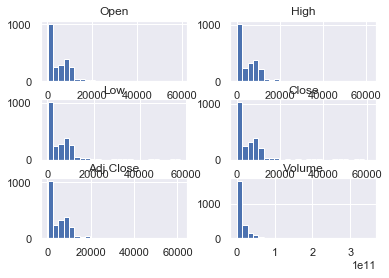

In [19]:
# checking the features
btc.hist(bins=25)

In [20]:
# format the raw date feature into a measureable format
btc['Date'] = pd.to_datetime(btc['Date'], format="%Y-%m-%dT%H:%M:%S")
eth['Date'] = pd.to_datetime(eth['Date'], format="%Y-%m-%dT%H:%M:%S")
ltc['Date'] = pd.to_datetime(ltc['Date'], format="%Y-%m-%dT%H:%M:%S")
gold['Date'] = pd.to_datetime(gold['Date'], format="%Y-%m-%dT%H:%M:%S")
goog['Date'] = pd.to_datetime(goog['Date'], format="%Y-%m-%dT%H:%M:%S")
tsla['Date'] = pd.to_datetime(tsla['Date'], format="%Y-%m-%dT%H:%M:%S")
amzn['Date'] = pd.to_datetime(amzn['Date'], format="%Y-%m-%dT%H:%M:%S")

In [21]:
# check the dataset
btc.head()

Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume  
0  21056800.0  
1  34483200.0  
2  37919700.0  
3  36863600.0  
4  26580100.0

In [22]:
# visualize the dataset by using Plotly
fig = go.Figure(data=[go.Candlestick(x= btc['Date'],
                open= btc['Open'], high= btc['High'],
                low= btc['Low'], close= btc['Close'])
                      ])

fig.update_layout(
    title='BTC Price',
    yaxis_title='Price',
    shapes = [dict(
        x0='2020-03-12', x1='2020-03-12', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-01-27', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Increase Period Begins')]
)

fig.update_yaxes(title_text = 'Price', tickprefix = 'USD ')

fig.show()

The candlestick chart is very effective to visualize these data. It shows the link between supply and demand which is influenced by the traders/investors emotions. We can clearly see the movements of Bitcoin in daily basis. By using this chart, you can select the particular time horizon that you want to observe.

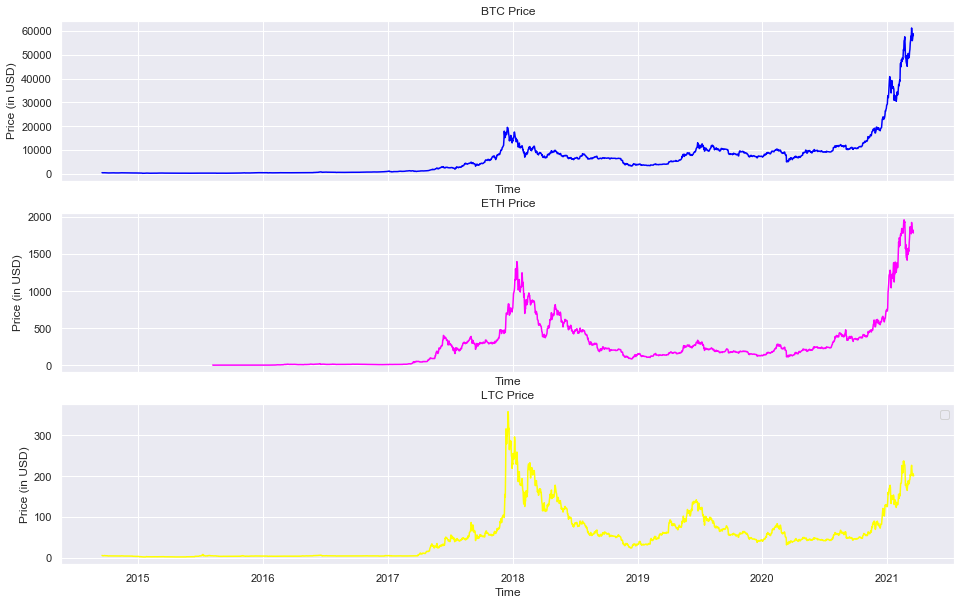

In [23]:
# Visualize the cryptocurrency dataset by using Matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 10))

ax1.plot(btc['Date'], btc['Close'], color = 'blue', label = 'Real price')
ax1.set_title('BTC Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (in USD)')

ax2.plot(eth['Date'], eth['Close'], color = 'magenta', label = 'Real price')
ax2.set_title('ETH Price')
ax2.set_xlabel('Time')
ax2.set_ylabel('Price (in USD)')

ax3.plot(ltc['Date'], ltc['Close'], color = 'yellow', label = 'Real price')
ax3.set_title('LTC Price')
ax3.set_xlabel('Time')
ax3.set_ylabel('Price (in USD)')

plt.legend((ax1, ax2, ax3), ('BTC', 'ETH', 'LTC'))

plt.show()

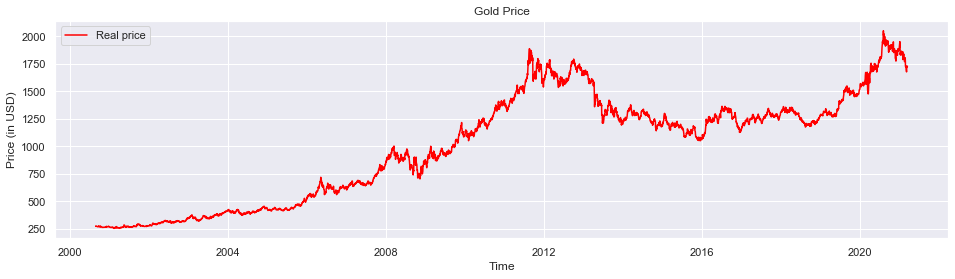

In [24]:
# Visualize the Gold dataset by using Matplotlib
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(gold['Date'], gold['Close'], color = 'red', label = 'Real price')
plt.title('Gold Price')
plt.xlabel('Time')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

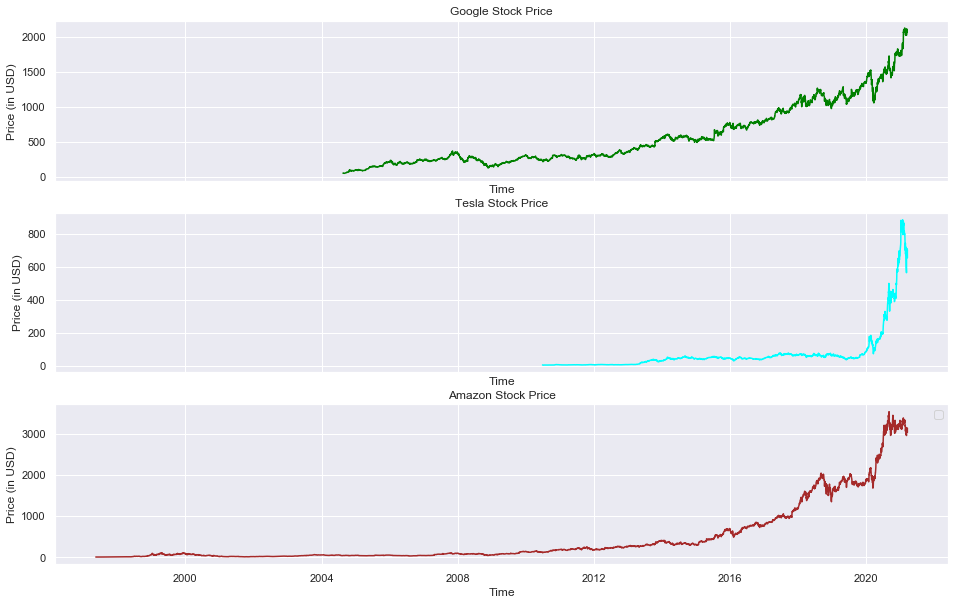

In [25]:
# Visualize the stocks dataset by using Matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 10))

ax1.plot(goog['Date'], goog['Close'], color = 'green', label = 'Real price')
ax1.set_title('Google Stock Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (in USD)')

ax2.plot(tsla['Date'], tsla['Close'], color = 'cyan', label = 'Real price')
ax2.set_title('Tesla Stock Price')
ax2.set_xlabel('Time')
ax2.set_ylabel('Price (in USD)')

ax3.plot(amzn['Date'], amzn['Close'], color = 'brown', label = 'Real price')
ax3.set_title('Amazon Stock Price')
ax3.set_xlabel('Time')
ax3.set_ylabel('Price (in USD)')

plt.legend((ax1, ax2, ax3), ('Google', 'Tesla', 'Amazon'))

plt.show()

## 4. Data Preparation

Let's extract some features...

In [26]:
# create rolling forecast using moving average (MA)
MA_day = [12, 26]

for i in MA_day:
    cols_name = 'MA for %s days' %(str(i))
    
    btc[cols_name] = btc['Close'].rolling(window=i, center=False).mean()

In [27]:
# create rolling forecast using moving average (MA)
MA_day = [12, 26]

for i in MA_day:
    cols_name = 'MA for %s days' %(str(i))
    
    eth[cols_name] = eth['Close'].rolling(window=i, center=False).mean()
    ltc[cols_name] = ltc['Close'].rolling(window=i, center=False).mean()
    gold[cols_name] = gold['Close'].rolling(window=i, center=False).mean()
    goog[cols_name] = goog['Close'].rolling(window=i, center=False).mean()
    tsla[cols_name] = tsla['Close'].rolling(window=i, center=False).mean()
    amzn[cols_name] = amzn['Close'].rolling(window=i, center=False).mean()

In [28]:
btc.tail()

Date          Open          High           Low         Close  \
2369 2021-03-13  57343.371094  61683.863281  56217.972656  61243.085938   
2371 2021-03-15  59267.429688  60540.992188  55393.164063  55907.199219   
2372 2021-03-16  55840.785156  56833.179688  53555.027344  56804.902344   
2373 2021-03-17  56825.828125  58969.816406  54528.628906  58870.894531   
2374 2021-03-18  57963.003906  59983.597656  57569.382813  58056.300781   

         Adj Close        Volume  MA for 12 days  MA for 26 days  
2369  61243.085938  6.066983e+10    52998.688802    51756.488281  
2371  55907.199219  6.641937e+10    53626.039714    52014.462440  
2372  56804.902344  5.974980e+10    54148.261393    52193.535307  
2373  58870.894531  6.025831e+10    55007.405274    52470.115986  
2374  58056.300781  5.715726e+10    55768.154948    52553.507061

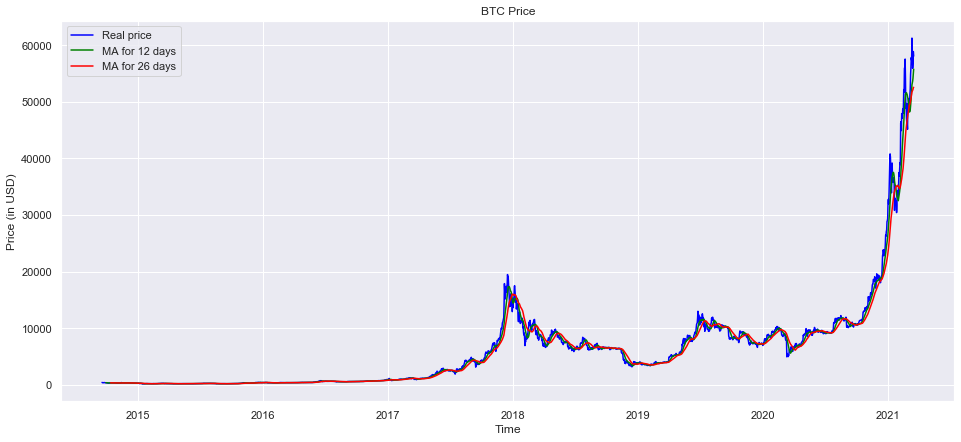

In [29]:
# Visualize the MA in the Bitcoin dataset by using Matplotlib
fig, ax = plt.subplots(figsize=(16, 7))
plt.plot(btc['Date'], btc['Close'], color = 'blue', label = 'Real price')
plt.plot(btc['Date'], btc['MA for 12 days'], color = 'green', label = 'MA for 12 days')
plt.plot(btc['Date'], btc['MA for 26 days'], color = 'red', label = 'MA for 26 days')
plt.title('BTC Price')
plt.xlabel('Time')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

In [30]:
# create the daily return features
btc['Daily Return'] = btc['Close'].pct_change()
eth['Daily Return'] = eth['Close'].pct_change()
ltc['Daily Return'] = ltc['Close'].pct_change()
gold['Daily Return'] = gold['Close'].pct_change()
goog['Daily Return'] = goog['Close'].pct_change()
tsla['Daily Return'] = tsla['Close'].pct_change()
amzn['Daily Return'] = amzn['Close'].pct_change()

In [31]:
# check the dataset
btc.tail()

Date          Open          High           Low         Close  \
2369 2021-03-13  57343.371094  61683.863281  56217.972656  61243.085938   
2371 2021-03-15  59267.429688  60540.992188  55393.164063  55907.199219   
2372 2021-03-16  55840.785156  56833.179688  53555.027344  56804.902344   
2373 2021-03-17  56825.828125  58969.816406  54528.628906  58870.894531   
2374 2021-03-18  57963.003906  59983.597656  57569.382813  58056.300781   

         Adj Close        Volume  MA for 12 days  MA for 26 days  Daily Return  
2369  61243.085938  6.066983e+10    52998.688802    51756.488281      0.068217  
2371  55907.199219  6.641937e+10    53626.039714    52014.462440     -0.087126  
2372  56804.902344  5.974980e+10    54148.261393    52193.535307      0.016057  
2373  58870.894531  6.025831e+10    55007.405274    52470.115986      0.036370  
2374  58056.300781  5.715726e+10    55768.154948    52553.507061     -0.013837

In [32]:
# check the dataset
gold.tail()

Date         Open         High          Low        Close  \
5227 2021-03-10  1713.599976  1722.900024  1711.000000  1721.500000   
5228 2021-03-11  1725.599976  1737.500000  1720.199951  1722.300049   
5229 2021-03-12  1715.900024  1722.500000  1699.000000  1719.500000   
5230 2021-03-15  1729.500000  1731.900024  1722.800049  1728.900024   
5231 2021-03-16  1730.000000  1731.199951  1728.900024  1729.900024   

        Adj Close  Volume  MA for 12 days  MA for 26 days  Daily Return  
5227  1721.500000   412.0     1732.349996     1774.199998      0.002854  
5228  1722.300049    18.0     1725.508331     1770.038462      0.000465  
5229  1719.500000    80.0     1719.099996     1765.703848     -0.001626  
5230  1728.900024    80.0     1715.308329     1763.396156      0.005467  
5231  1729.900024  3232.0     1715.458333     1760.280771      0.000578

In [33]:
# check the dataset
goog.tail()

Date         Open         High          Low        Close  \
4168 2021-03-11  2074.060059  2125.699951  2072.379883  2114.770020   
4169 2021-03-12  2085.000000  2090.260010  2047.550049  2061.919922   
4170 2021-03-15  2062.300049  2067.060059  2043.510010  2066.489990   
4171 2021-03-16  2078.989990  2123.560059  2070.000000  2092.520020   
4172 2021-03-17  2076.030029  2109.780029  2054.000000  2091.080078   

        Adj Close   Volume  MA for 12 days  MA for 26 days  Daily Return  
4168  2114.770020  1238300     2062.645843     2079.164612      0.029070  
4169  2061.919922  1725000     2059.875010     2078.851145     -0.024991  
4170  2066.489990  1298100     2062.802511     2079.009601      0.002216  
4171  2092.520020  1490600     2067.440847     2078.798833      0.012596  
4172  2091.080078  1297500     2068.238353     2078.728455     -0.000688

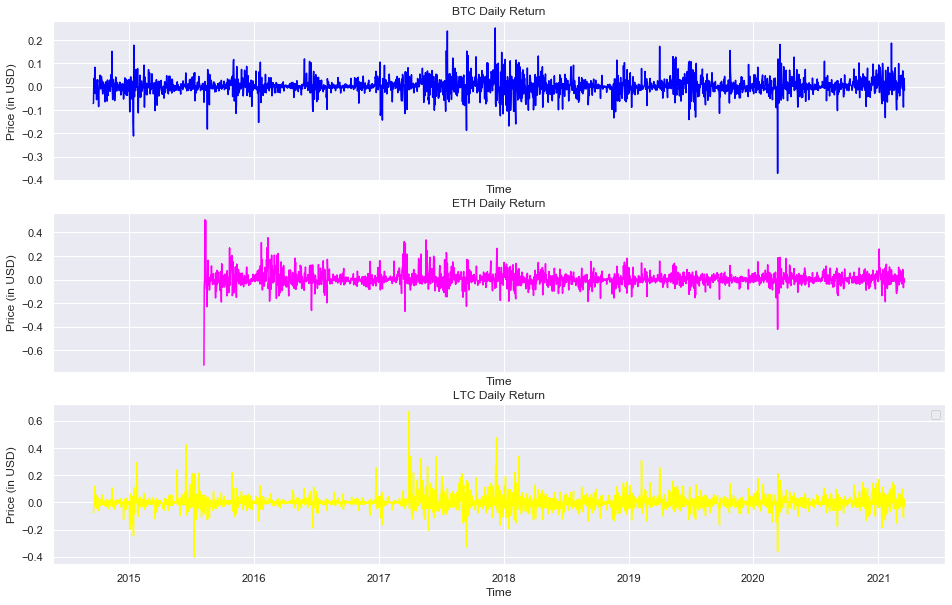

In [34]:
# visualize the cryptocurrency daily return
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 10))

ax1.plot(btc['Date'], btc['Daily Return'], color = 'blue', label = 'value')
ax1.set_title('BTC Daily Return')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (in USD)')

ax2.plot(eth['Date'], eth['Daily Return'], color = 'magenta', label = 'value')
ax2.set_title('ETH Daily Return')
ax2.set_xlabel('Time')
ax2.set_ylabel('Price (in USD)')

ax3.plot(ltc['Date'], ltc['Daily Return'], color = 'yellow', label = 'value')
ax3.set_title('LTC Daily Return')
ax3.set_xlabel('Time')
ax3.set_ylabel('Price (in USD)')

plt.legend((ax1, ax2, ax3), ('BTC', 'ETH', 'LTC'))

plt.show()

You can use this graph to see the daily return of a cryptocurrency or other asset. We can also add the daily return control limit up to +- 3 standard deviation.

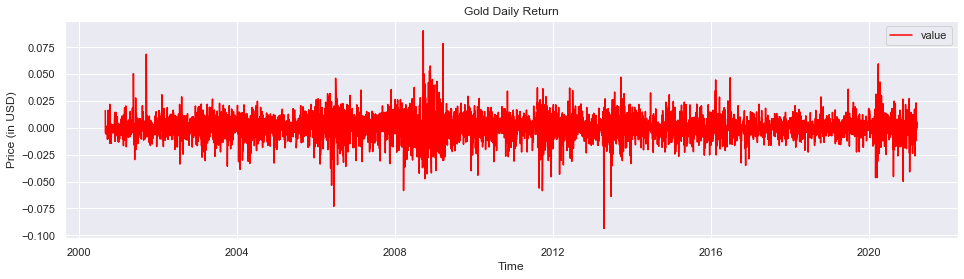

In [35]:
# visualize the Gold daily return
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(gold['Date'], gold['Daily Return'], color = 'red', label = 'value')
plt.title('Gold Daily Return')
plt.xlabel('Time')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

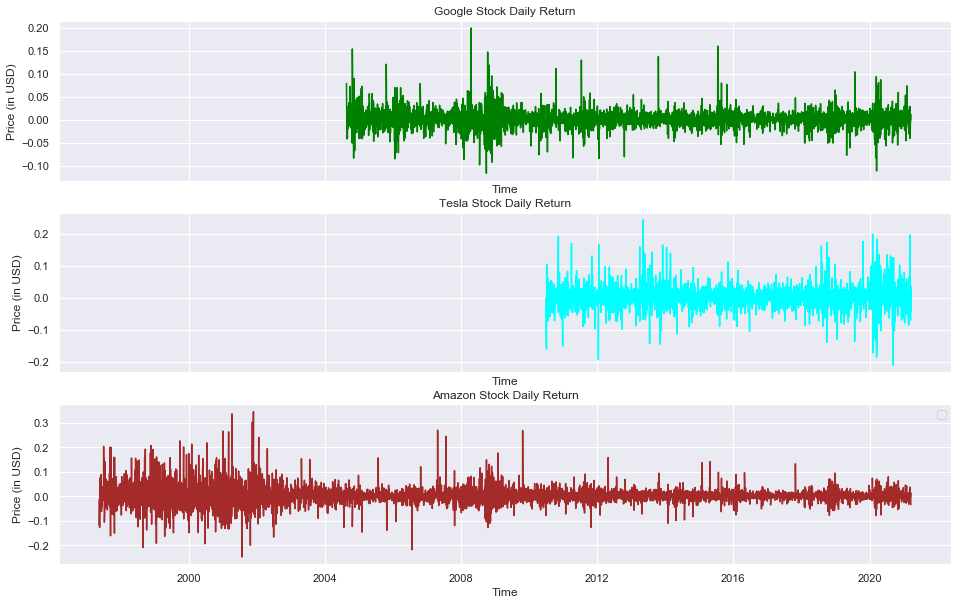

In [36]:
# visualize the stocks daily return
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(16, 10))

ax1.plot(goog['Date'], goog['Daily Return'], color = 'green', label = 'value')
ax1.set_title('Google Stock Daily Return')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (in USD)')

ax2.plot(tsla['Date'], tsla['Daily Return'], color = 'cyan', label = 'value')
ax2.set_title('Tesla Stock Daily Return')
ax2.set_xlabel('Time')
ax2.set_ylabel('Price (in USD)')

ax3.plot(amzn['Date'], amzn['Daily Return'], color = 'brown', label = 'value')
ax3.set_title('Amazon Stock Daily Return')
ax3.set_xlabel('Time')
ax3.set_ylabel('Price (in USD)')

plt.legend((ax1, ax2, ax3), ('Google', 'Tesla', 'Amazon'))

plt.show()

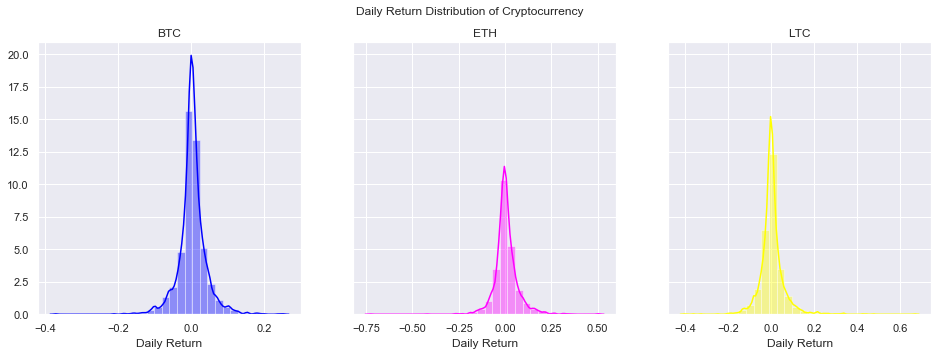

In [37]:
# check the distribution of the Bitcoin daily return
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,5))
fig.suptitle('Daily Return Distribution of Cryptocurrency')

#Bitcoin
sns.distplot(ax=ax1, a=btc['Daily Return'].dropna(), bins=30, color='blue')
ax1.set_title('BTC')

#Etherium
sns.distplot(ax=ax2, a=eth['Daily Return'].dropna(), bins=30, color='magenta')
ax2.set_title('ETH')

#Litecoin
sns.distplot(ax=ax3, a=ltc['Daily Return'].dropna(), bins=30, color='yellow')
ax3.set_title('LTC')

plt.show()

The negative daily return is slightly more frequent than the positive daily return. The risk of getting a negative return in cryptocurrencies is likely to be high. However, the positive return of Bitcoin could be high as well along with the increase of cryptocurrencies value.

Text(0.5, 1.0, 'Daily Return Distribution of Gold')

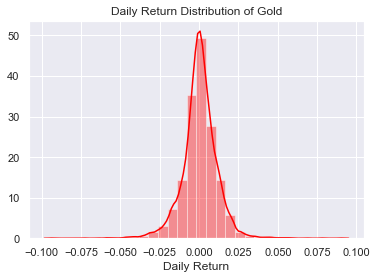

In [38]:
# check the distribution of Gold daily return
sns.distplot(gold['Daily Return'].dropna(), bins=30, color='red')
plt.title('Daily Return Distribution of Gold')

The daily return distribution of gold is quite good. The frequency of positive return is higher than the negative return and the variation is not so high. The return might be not big, but it is less risky than other alternatives.

Text(0.5, 1.0, 'Amazon')

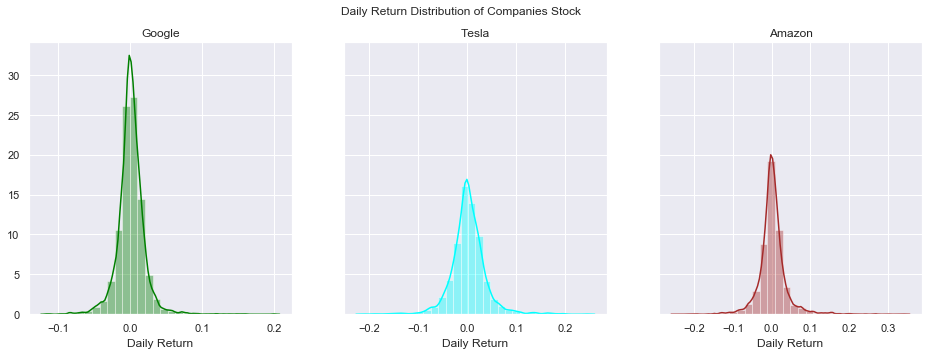

In [39]:
# check the distribution of Stock daily return
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,5))
fig.suptitle('Daily Return Distribution of Companies Stock')

#Google
sns.distplot(ax=ax1, a=goog['Daily Return'].dropna(), bins=30, color='green')
ax1.set_title('Google')

#Tesla
sns.distplot(ax=ax2, a=tsla['Daily Return'].dropna(), bins=30, color='cyan')
ax2.set_title('Tesla')

#Amazon
sns.distplot(ax=ax3, a=amzn['Daily Return'].dropna(), bins=30, color='brown')
ax3.set_title('Amazon')

Based on the distribution of daily returns, negative daily returns are slightly more frequent than positive daily returns in the Tesla stock. On the other hand, th positive daily returns are slightly more frequent than the negative returns in the Goole stock and Amazon stock.

The risk of getting a negative return from investing in Tesla stock is higher than Google stock and Amazon stock. However, a positive return on stock prices can be higher as well depending on the company's performance and their corporate actions.

### Value at Risk

In [40]:
# quantile method - Bitcoin
btc_var = btc['Daily Return'].quantile(0.05)
print(btc_var)

-0.05996990354960165


In [41]:
# Bitcoion daily return
btc_mean = btc['Daily Return'].mean()
print(btc_mean)

0.002813521191191826


In [42]:
# quantile method - Ethereum
eth_var = eth['Daily Return'].quantile(0.05)
print(eth_var)

-0.08180733155072246


In [43]:
# Ethereum daily return
eth_mean = eth['Daily Return'].mean()
print(eth_mean)

0.005374757848228016


In [44]:
# quantile method - Litecoin
ltc_var = ltc['Daily Return'].quantile(0.05)
print(ltc_var)

-0.07751661954456729


In [45]:
# Litecoin daily return
ltc_mean = ltc['Daily Return'].mean()
print(ltc_mean)

0.003169885720543752


In [46]:
# quantile method - Gold
gold_var = gold['Daily Return'].quantile(0.05)
print(gold_var)

-0.017667672007835557


In [47]:
# Gold daily return
gold_mean = gold['Daily Return'].mean()
print(gold_mean)

0.0004226070017919714


In [48]:
# quantile method - Google Stock
goog_var = goog['Daily Return'].quantile(0.05)
print(goog_var)

-0.02766859517486504


In [49]:
# Google daily return
goog_mean = goog['Daily Return'].mean()
print(goog_mean)

0.0010795452988801876


In [50]:
# quantile method - Tesla Stock
tsla_var = tsla['Daily Return'].quantile(0.05)
print(tsla_var)

-0.04876280823849917


In [51]:
# Tesla daily return
tsla_mean = tsla['Daily Return'].mean()
print(tsla_mean)

0.002459801281479329


In [52]:
# quantile method - Amazon Stock
amzn_var = amzn['Daily Return'].quantile(0.05)
print(amzn_var)

-0.050160533811897196


In [53]:
# Amazon daily return
amzn_mean = amzn['Daily Return'].mean()
print(amzn_mean)

0.001890989565352357


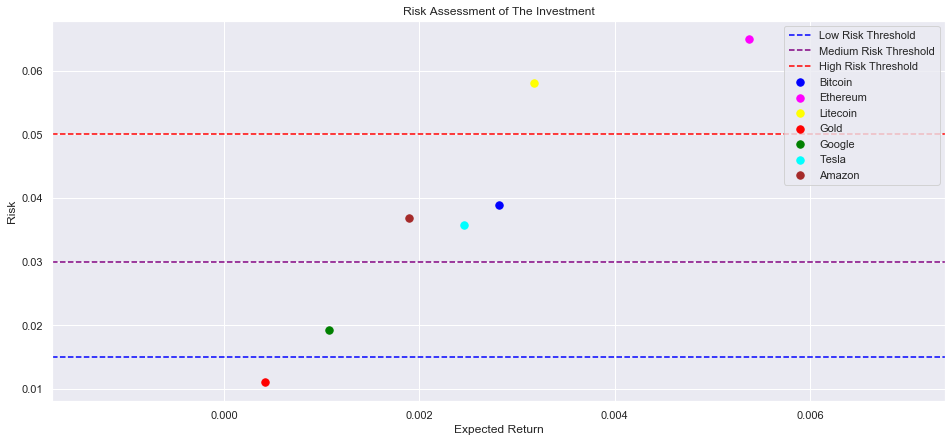

In [54]:
# how much value do we put at risk by investing in different asset class mix
fig, ax = plt.subplots(figsize=(16, 7))
plt.scatter(btc['Daily Return'].mean(), btc['Daily Return'].std(), s=55, color = 'blue', label = 'Bitcoin')
plt.scatter(eth['Daily Return'].mean(), eth['Daily Return'].std(), s=55, color = 'magenta', label = 'Ethereum')
plt.scatter(ltc['Daily Return'].mean(), ltc['Daily Return'].std(), s=55, color = 'yellow', label = 'Litecoin')
plt.scatter(gold['Daily Return'].mean(), gold['Daily Return'].std(), s=55, color = 'red', label = 'Gold')
plt.scatter(goog['Daily Return'].mean(), goog['Daily Return'].std(), s=55, color = 'green', label = 'Google')
plt.scatter(tsla['Daily Return'].mean(), tsla['Daily Return'].std(), s=55, color = 'cyan', label = 'Tesla')
plt.scatter(amzn['Daily Return'].mean(), amzn['Daily Return'].std(), s=55, color = 'brown', label = 'Amazon')
plt.title('Risk Assessment of The Investment')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.axhline(y=0.015, color='blue', linestyle='--', label='Low Risk Threshold')
plt.axhline(y=0.03, color='purple', linestyle='--', label='Medium Risk Threshold')
plt.axhline(y=0.05, color='red', linestyle='--', label='High Risk Threshold')
plt.legend()
plt.show()

High Risk, High Return. This statement is suitable for investing in cryptocurrency. Sometimes you may gain a lot and sometimes you may lose a lot.

Say there is a trader / investor who wants to invest his/her money. He/She wants to get a high return investment even though the risk of loss is high. They can choose to invest their money in cryptocurrency. If he/she wants to invest safely, he/she can invest in gold or stocks like Google. 
However, the rate of return is not high compared to other investment alternatives (other asset class mix). 

If they want more return on their investment, they can invest their money in Tesla stock, Amazon stock, or Bitcoin. 

Note that the threshold is determined subjectively. It depends on the investor's risk appetite. 

Let's say we are aggressive traders/investors for this case. Thus, we want to invest our money in Bitcoin as a digital gold. We hope to get a high return on investment in the future. So, we're going to explore the Bitcoin data set a little deeper and predict its value.

In [55]:
# create the MACD (Moving Average Convergence Divergence) feature
btc['MACD'] = btc['MA for 26 days'] - btc['MA for 12 days']

# create a signal line
btc['Signal Line'] = btc['MACD'].rolling(window=9, center=False).mean()

# different
btc['Diff'] = btc['MACD'] - btc['Signal Line']

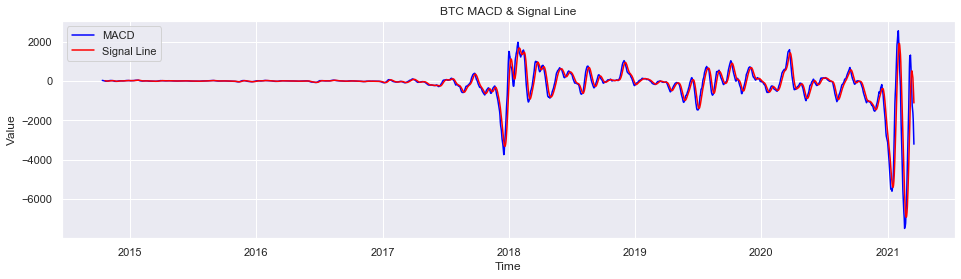

In [56]:
# visualize Bitcoin MACD
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(btc['Date'], btc['MACD'], color = 'blue', label = 'MACD')
plt.plot(btc['Date'], btc['Signal Line'], color = 'red', label = 'Signal Line')
plt.title('BTC MACD & Signal Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [57]:
# visualize the Bitcoin MACD and Signal Line by using Plotly
cols = ['MACD', 'Signal Line', 'Diff']

fig = px.line(btc, x = 'Date', y = btc[cols].columns,
              hover_data={'Date': '|%B %d, %Y'},
              title='Bitcoin MACD & Signal Line')

fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.update_yaxes(title_text = 'Price', tickprefix = 'USD ')

fig.show()

In [58]:
# Create the RSI feature
rsi_day = 20
rsi_indicator = RSIIndicator(btc['Close'], rsi_day)
btc['RSI'] = rsi_indicator.rsi()

In [59]:
# create a function for generating the Buy or Sell signals

# set the RSI lower limit and upper limit
lower_limit_rsi = 30
upper_limit_rsi = 70

# set some parameters
prev_sign = None
parameters = []
buy = []
sell = []
buy_action = lambda x, btc: btc['RSI'].values[x] < lower_limit_rsi
sell_action = lambda x, btc: btc['RSI'].values[x] > upper_limit_rsi

# create the for loop and if-else function
for i in range(0, len(btc)):
    # if buy is true and previous signal is not Buy
    if buy_action(i, btc) and prev_sign != 'Buy':
        prev_sign = 'Buy'
        parameters.append(prev_sign)
        buy.append(btc['Close'].iloc[i])
        sell.append(np.nan)
        
    # if sell is true and previous signal is Buy
    elif sell_action(i, btc)  and prev_sign == 'Buy':
        prev_sign = 'Sell'
        parameters.append(prev_sign)
        buy.append(np.nan)
        sell.append(btc['Close'].iloc[i])
    else:
        parameters.append(prev_sign)
        buy.append(np.nan)
        sell.append(np.nan)

# assign the result to dataframe        
btc['Previous_Signal'] = np.array(prev_sign)
btc['Params'] = np.array(parameters)
btc['Buy_Signal'] = np.array(buy)
btc['Sell_Signal'] = np.array(sell)

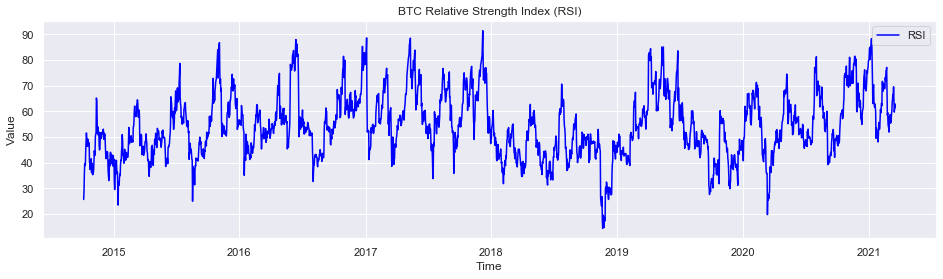

In [60]:
# visualize Bitcoin Relative Strength Index (RSI)
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(btc['Date'], btc['RSI'], color = 'blue', label = 'RSI')
plt.title('BTC Relative Strength Index (RSI)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

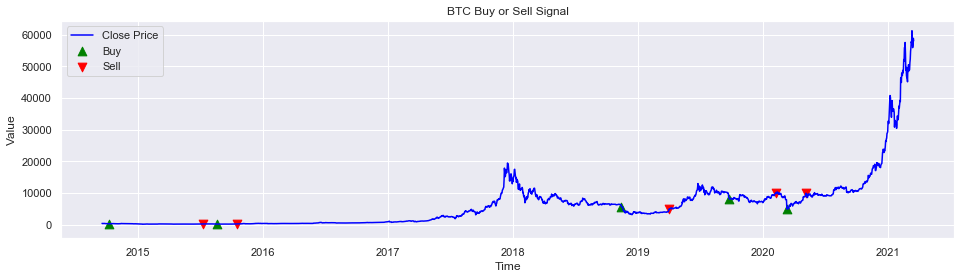

In [61]:
# visualize Bitcoin Buy or Sell Signal
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(btc['Date'], btc['Close'], color = 'blue', label = 'Close Price')
plt.scatter(btc['Date'], btc['Buy_Signal'], color = 'green', label = 'Buy', marker='^', s=76)
plt.scatter(btc['Date'], btc['Sell_Signal'], color = 'red', label = 'Sell', marker='v', s=76)
plt.title('BTC Buy or Sell Signal')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## 5. Modelling and Validation

In [62]:
# select the feature
btc_close = btc['Close']

In [63]:
# create a function for autocorrelation
def autocorrelation_plot(x):
    sm.graphics.tsa.plot_acf(x.values.squeeze(), lags=30)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.xticks(np.arange(0., 31., step=5))
    plt.yticks(np.arange(-0.5, 1.1, step=0.5))
    plt.show()

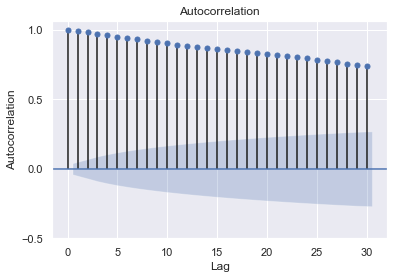

In [64]:
# apply the autocorrelation function
autocorrelation_plot(btc_close)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


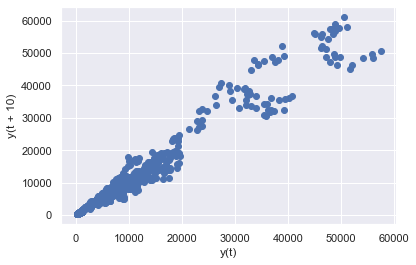

In [65]:
# try 10 lags
lag_plot(btc_close, lag=10)
plt.show()

Let's try to use 10 lags for our ARIMA model.

In [66]:
# fit the ARIMA model
model = ARIMA(btc_close, order=(10,1,0))
model_fit = model.fit()

In [67]:
# model summary 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2369
Model:                ARIMA(10, 1, 0)   Log Likelihood              -17989.905
Method:                       css-mle   S.D. of innovations            480.508
Date:                Fri, 26 Mar 2021   AIC                          36003.811
Time:                        15:04:04   BIC                          36073.053
Sample:                             1   HQIC                         36029.018
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.1729     13.815      1.822      0.069      -1.904      52.250
ar.L1.D.Close     -0.0142      0.020     -0.703      0.482      -0.054       0.025
ar.L2.D.Close      0.0460      0.020

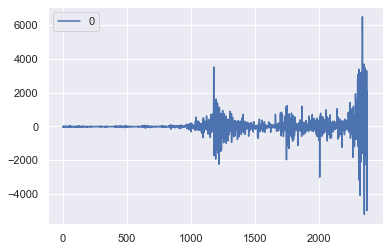

In [68]:
# visualize the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

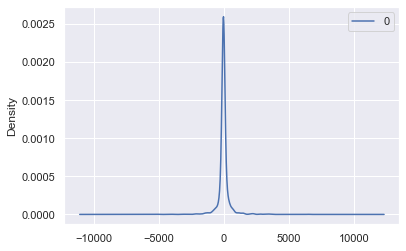

In [69]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [70]:
# summary stats of residuals
print(residuals.describe())

                 0
count  2369.000000
mean      0.055936
std     480.609920
min   -5213.505121
25%     -48.506334
50%     -16.224104
75%      34.668806
max    6483.082018


In [71]:
# split into train set and test set (80:20)
X = btc_close.values
sample_size = int(len(X) * 0.8)
X_train, X_test = X[0:sample_size], X[sample_size:len(X)]
history = [x for x in X_train]
predictions = list()

In [72]:
# one-step-ahead prediction by using ARIMA
for cycle in range(len(X_test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    test = X_test[cycle]
    history.append(test)
    print('prediction=%f, real=%f' % (y_pred, test))

prediction=7163.542514, real=7218.371094
prediction=7198.884088, real=7531.663574
prediction=7562.071438, real=7463.105957
prediction=7385.838085, real=7761.243652
prediction=7768.620628, real=7569.629883
prediction=7486.475408, real=7424.292480
prediction=7403.087377, real=7321.988281
prediction=7289.126821, real=7320.145508
prediction=7317.933706, real=7252.034668
prediction=7247.855942, real=7448.307617
prediction=7476.119436, real=7546.996582
prediction=7599.155459, real=7556.237793
prediction=7562.907937, real=7564.345215
prediction=7585.556855, real=7400.899414
prediction=7380.236761, real=7278.119629
prediction=7257.100969, real=7217.427246
prediction=7194.910166, real=7243.134277
prediction=7258.911835, real=7269.684570
prediction=7261.639595, real=7124.673828
prediction=7149.693596, real=7152.301758
prediction=7178.839329, real=6932.480469
prediction=6924.661426, real=6640.515137
prediction=6639.612502, real=7276.802734
prediction=7276.342020, real=7202.844238
prediction=7180.

prediction=9491.663856, real=9386.788086
prediction=9390.442311, real=9450.702148
prediction=9409.647523, real=9538.024414
prediction=9589.596224, real=9480.254883
prediction=9499.868294, real=9411.840820
prediction=9391.280736, real=9288.018555
prediction=9299.245712, real=9332.340820
prediction=9284.197169, real=9303.629883
prediction=9315.192517, real=9648.717773
prediction=9656.515810, real=9629.658203
prediction=9617.191055, real=9313.610352
prediction=9327.341582, real=9264.813477
prediction=9271.071352, real=9162.917969
prediction=9181.243303, real=9045.390625
prediction=9031.026257, real=9143.582031
prediction=9103.327999, real=9190.854492
prediction=9221.552886, real=9137.993164
prediction=9150.347318, real=9228.325195
prediction=9262.427981, real=9123.410156
prediction=9129.089503, real=9087.303711
prediction=9054.007913, real=9132.488281
prediction=9116.001158, real=9073.942383
prediction=9073.633380, real=9375.474609
prediction=9366.335206, real=9252.277344
prediction=9258.

prediction=26831.746376, real=26272.294922
prediction=26229.187645, real=27084.808594
prediction=27215.952516, real=27362.437500
prediction=27339.266019, real=28840.953125
prediction=28939.948888, real=29001.720703
prediction=29033.072244, real=29374.152344
prediction=29424.761506, real=32127.267578
prediction=32396.456202, real=32782.023438
prediction=33117.808293, real=31971.914063
prediction=32188.271871, real=33992.429688
prediction=34155.583513, real=36824.363281
prediction=37329.400757, real=39371.042969
prediction=39744.093018, real=40797.609375
prediction=41338.814365, real=40254.546875
prediction=40833.180717, real=38356.441406
prediction=38638.611969, real=35566.656250
prediction=35595.725362, real=33922.960938
prediction=33781.676462, real=37316.359375
prediction=38073.355852, real=39187.328125
prediction=39899.318060, real=36825.367188
prediction=36377.519684, real=36178.140625
prediction=36051.105488, real=35791.277344
prediction=35935.444618, real=36630.074219
prediction=

In [73]:
# check the test set shape
X_test.shape

(474,)

In [74]:
# check the shape of X
X.shape

(2370,)

In [75]:
# create a new dataframe for visualization
date = pd.DataFrame(btc['Date'][1896:]) 
test_value = pd.DataFrame(X_test, columns=['Real price'])
pred_value = pd.DataFrame(predictions, columns=['Predicted price']) 

In [76]:
# reset index
date = date.reset_index()

In [77]:
# combine the desired value into one dataframe
df = pd.concat([date, test_value, pred_value], axis=1)
df = df.drop(columns='index')
df

Date    Real price  Predicted price
0   2019-11-26   7218.371094      7163.542514
1   2019-11-27   7531.663574      7198.884088
2   2019-11-28   7463.105957      7562.071438
3   2019-11-29   7761.243652      7385.838085
4   2019-11-30   7569.629883      7768.620628
..         ...           ...              ...
469 2021-03-13  61243.085938     57793.465585
470 2021-03-15  55907.199219     61157.254495
471 2021-03-16  56804.902344     56357.793310
472 2021-03-17  58870.894531     56516.903686
473 2021-03-18  58056.300781     59002.842763

[474 rows x 3 columns]

In [78]:
# visualize the Bitcoin price prediction by using Plotly
fig = px.line(df, x = 'Date', y = df.columns,
              hover_data={'Date': '|%B %d, %Y'},
              title='Bitcoin Price Prediction')

fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.update_yaxes(title_text = 'Price', tickprefix = 'USD ')

fig.show()

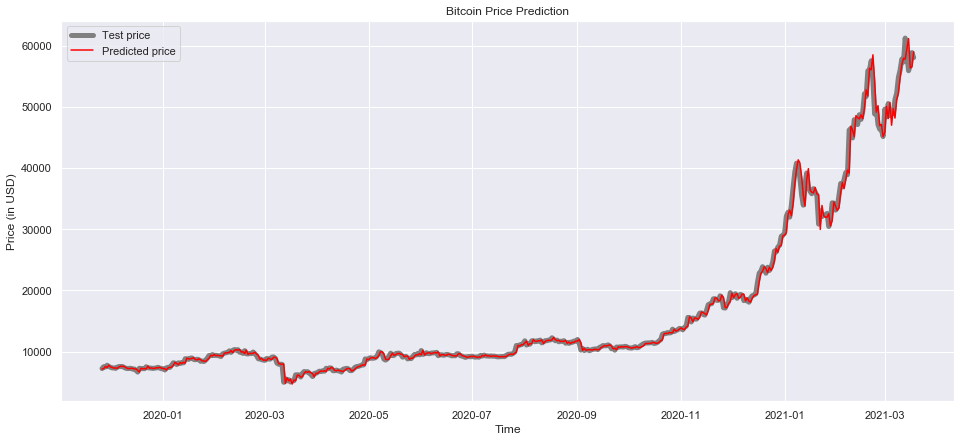

In [79]:
# Visualize the prediction results by using Matplotlib
fig, ax = plt.subplots(figsize=(16, 7))
plt.plot(btc['Date'][1896:], X_test, color = 'grey', label = 'Test price', linewidth=5)
plt.plot(btc['Date'][1896:], predictions, color = 'red', label = 'Predicted price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

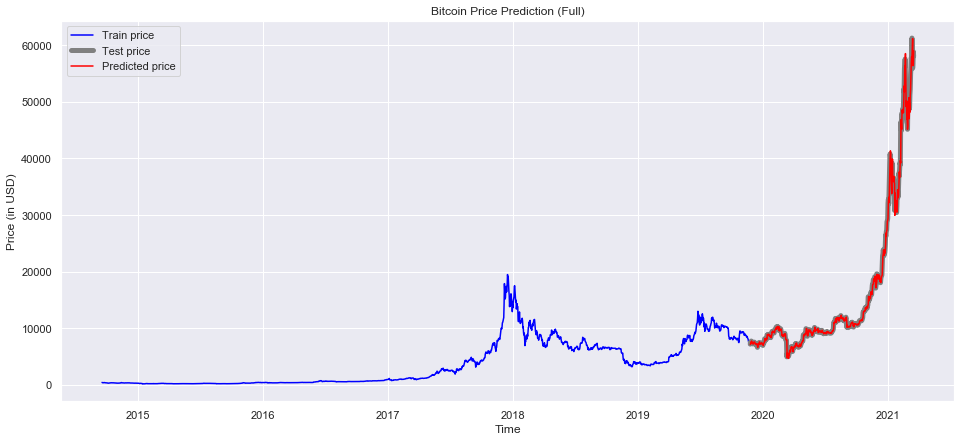

In [80]:
# Visualize the prediction result and the real price of Bitcoin by using Matplotlib
fig, ax = plt.subplots(figsize=(16, 7))
plt.plot(btc['Date'][:1896], X_train, color = 'blue', label = 'Train price')
plt.plot(btc['Date'][1896:], X_test, color = 'grey', label = 'Test price', linewidth=5)
plt.plot(btc['Date'][1896:], predictions, color = 'red', label = 'Predicted price')
plt.title('Bitcoin Price Prediction (Full)')
plt.xlabel('Time')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

Wohooo! The result is quite good. We can accurately predict the test set (20% of the dataset) using the ARIMA model that was trained by using the train set (the first 80% of the dataset).

Let's evaluate this model now~

## 6. Evaluation

In [81]:
# Mean Squared Error (MSE)
mse = mean_squared_error(X_test, predictions)
print('Test MSE: %.3f' % mse)

Test MSE: 935972.436


In [82]:
# Root Mean Square Error (RMSE)
rmse = sqrt(mean_squared_error(X_test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 967.457


In [83]:
# R-squared (R2)
r2 = r2_score(X_test, predictions)
print('Test R2: %.3f' % r2)

Test R2: 0.994


The MSE and RMSE of this model are low. For the R-squared, the best possible score is 1.0 and the score can be negative because the model is arbitrarily worse. 0 (zero) score means that it's a constant model that always predicts the expected value of y. The R-squared score of 0.994 shows that the model is good enough to predict the test set.

## Conclusion

Here are some conclusions that we can draw after evaluating the results:

1. Bitcoin yields high returns for traders or investors. However, the risk of losing your money is higher than other alternatives.
2. By implementing technical analysis parameters such as MACD, RSI, Signal Buy / Sell, we can make better decisions in the future.
3. Several data visualization tools (ie Plotly, Seaborn, Matplotlib) make it easy to understand data and form decisions.
4. The Autoregressive Integrated Moving Average (ARIMA) model works perfectly with the dataset. It can accurately predict the Bitcoin dataset. By using 80% of the dataset we can predict the test set with an MSE score of 935972.436, an RMSE score of 967.457, and an R-squared score of 0.994.

## 7. Deployment

In this Bitcoin analysis and prediction project, we did not cover the deployment part.

Note that in this part you will have to apply the conclusion to the business domain. Several activities should be conducted in this phase as below:
1. Plan deployment
2. Plan monitoring and maintenance
3. Produce final report
4. Review project

### References

1. Brownlee, J. (2017). A Gentle Introduction to Autocorrelation and Partial Autocorrelation. URL: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
2. Brownlee, J. (2017). How to Create an ARIMA model for Time Series Forecasting in Python. URL: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
4. Investopedia (2019). Autoregressive Integrated Moving Average. URL: https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp
3. Investopedia (2021). Cryptocurrency. URL: https://www.investopedia.com/terms/c/cryptocurrency.asp
5. Malik, F. (2021). Automating Stock Investing Technical Analysis with Python. URL: https://medium.com/fintechexplained/automating-stock-investing-technical-analysis-with-python-81c669e360b2
6. Pai, Ping-Feng & Lin, Chih-Sheng. (2005). A hybrid ARIMA and support vector machines model in stock price forecasting. Omega (Oxford), 33(6), pp.497–505.